<a href="https://colab.research.google.com/github/sahilf2001/-LGMVIP-DataScience/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [71]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# **IMPORTING DATASET**

In [17]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names = ["sepalLength","sepalWidth","petalLength","petalWidth","flowerClass"])
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,flowerClass
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df.tail()

,sepalLength,sepalWidth,petalLength,petalWidth,flowerClass
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# **EXPLORING THE DATASET**

In [19]:
df.shape

(150, 5)

In [20]:
df.isnull().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
flowerClass    0
dtype: int64

In [22]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
df['flowerClass'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   flowerClass  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **VISULIZATIONS**

# 2D SCATTER PLOT

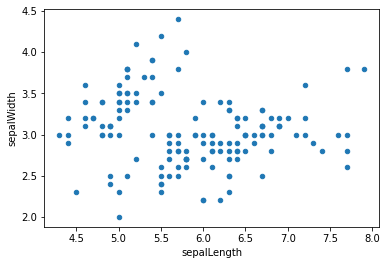

In [72]:
df.plot(kind='scatter', x='sepalLength', y='sepalWidth') ;
plt.show()

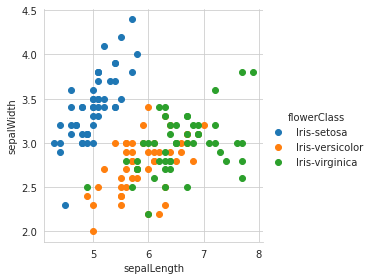

In [75]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="flowerClass", height=4) \
   .map(plt.scatter, "sepalLength", "sepalWidth") \
   .add_legend()
plt.show()

# PAIR PLOT

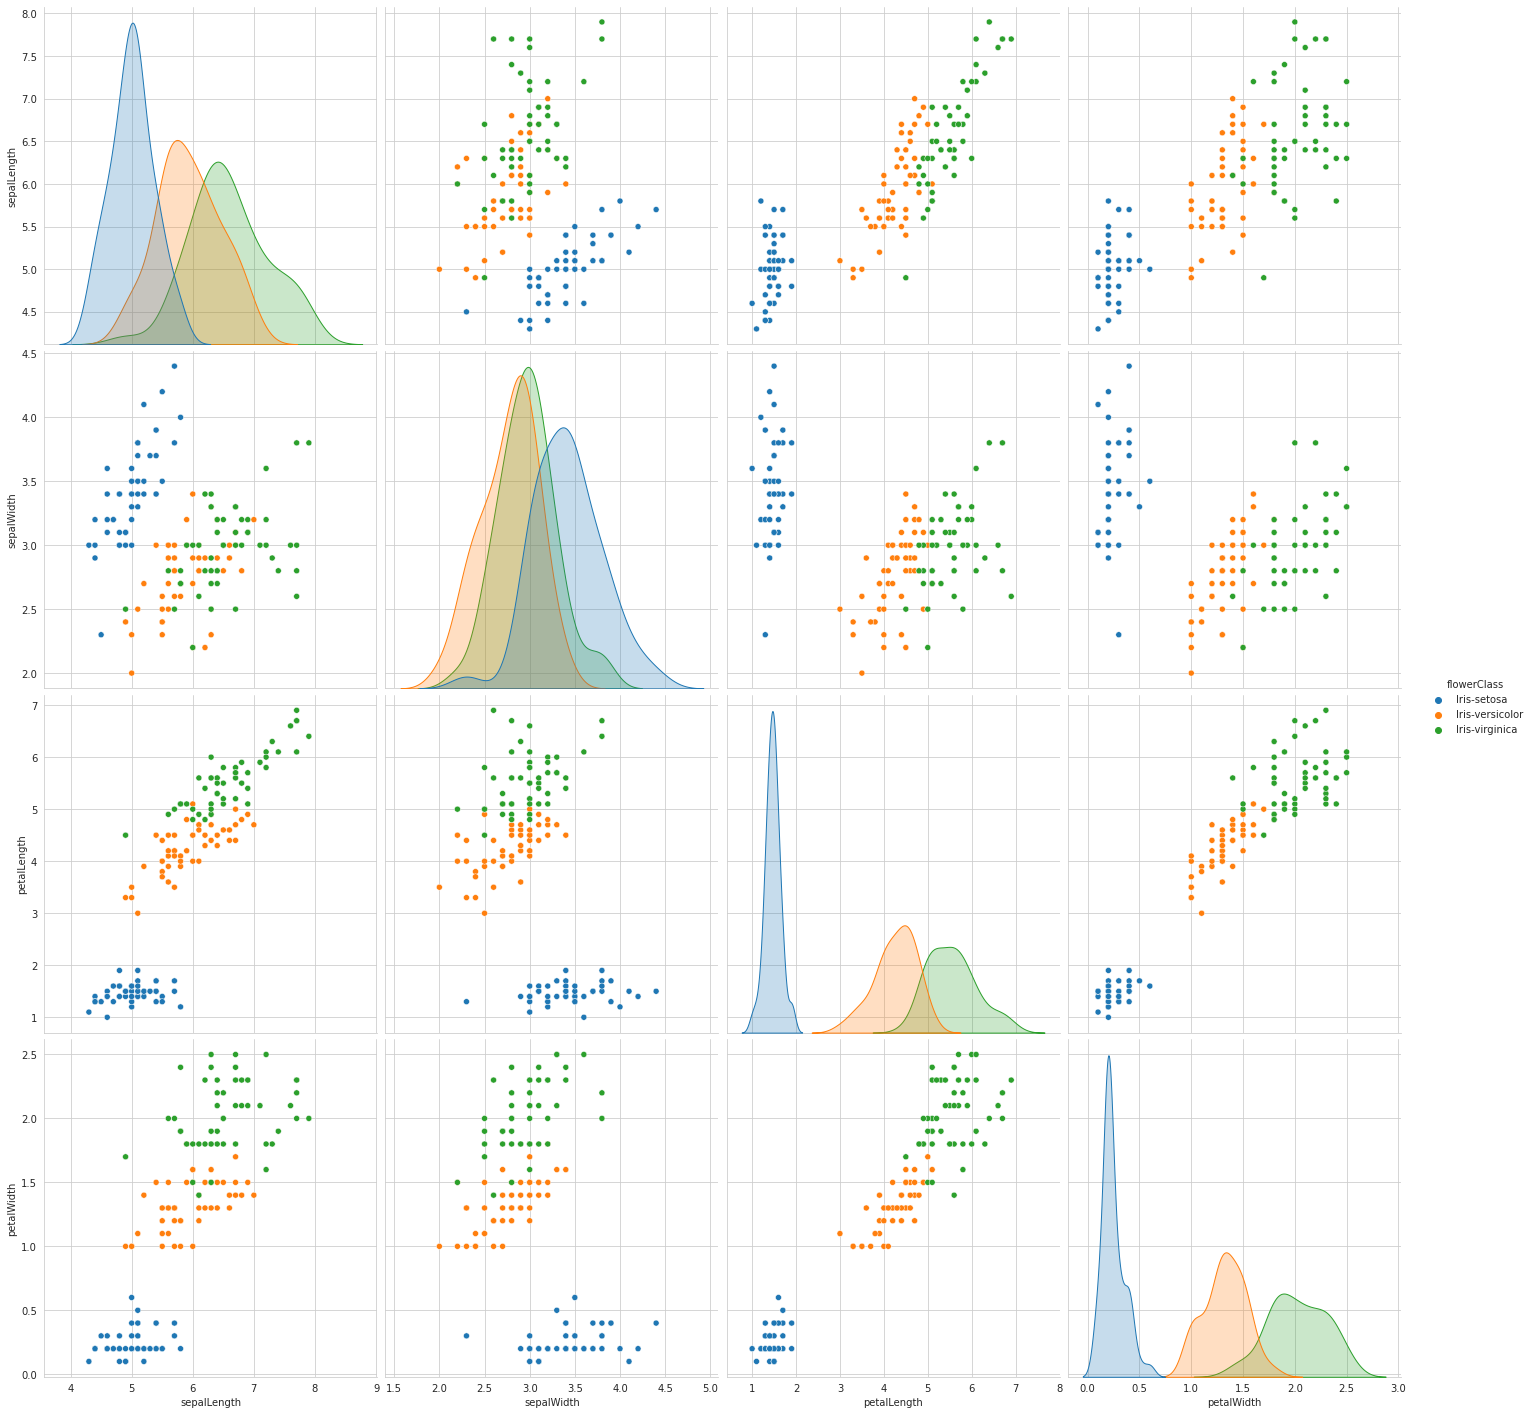

In [76]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="flowerClass", height=5);
plt.show()

# 1D SCATTER PLOT

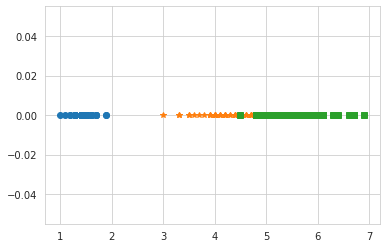

In [79]:
iris_setosa = df.loc[df["flowerClass"] == "Iris-setosa"]
iris_virginica = df.loc[df["flowerClass"] == "Iris-virginica"]
iris_versicolor = df.loc[df["flowerClass"] == "Iris-versicolor"]
plt.plot(iris_setosa["petalLength"], np.zeros_like(iris_setosa['petalLength']), 'o')
plt.plot(iris_versicolor["petalLength"], np.zeros_like(iris_versicolor['petalLength']), '*')
plt.plot(iris_virginica["petalLength"], np.zeros_like(iris_virginica['petalLength']), 's')

plt.show()

# HISTOGRAM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

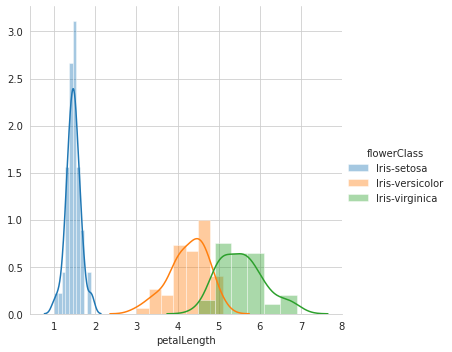

In [80]:
sns.FacetGrid(df, hue="flowerClass", height=5) \
   .map(sns.distplot, "petalLength") \
   .add_legend();
plt.show();


# PDF & CDF PLOT

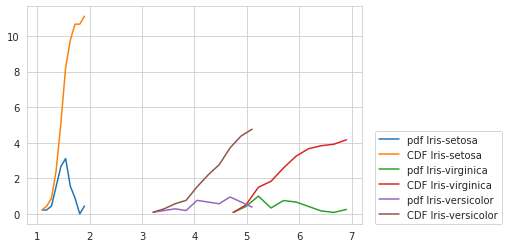

In [81]:
for species in ["Iris-setosa", "Iris-virginica", 'Iris-versicolor']:
    data = df.loc[df["flowerClass"] == species]
    counts, bin_edges = np.histogram(data['petalLength'], bins=10, 
                                     density = True)
    pdf = counts
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, label='pdf '+species)
    plt.plot(bin_edges[1:], cdf, label='CDF '+species)
plt.legend(loc=(1.04,0))
plt.show()

# **SPLITTING THE DATASET**

In [32]:
X = df.iloc[:,0:4].values
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [34]:
y = df.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: flowerClass, Length: 150, dtype: object

In [35]:
type(y)

pandas.core.series.Series

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
y.shape

(150,)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=2)

In [48]:
X_train.shape

(120, 4)

In [49]:
y_train.shape

(120,)

# **MODEL BUILDING**

In [52]:
clf = DecisionTreeClassifier(random_state=0)


In [53]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# **MODEL PERFORMANCE EVALUATION**

In [54]:
y_pred1 = clf.predict(X_test)

In [55]:
cross_val_score(clf, X_train, y_train, cv=10)

array([1.        , 0.91666667, 0.91666667, 1.        , 1.        ,
       1.        , 0.91666667, 0.83333333, 1.        , 1.        ])

In [58]:
accuracy_score(y_test, y_pred1)

0.9333333333333333

In [60]:
f1_score(y_test, y_pred1,average='weighted')

0.9333333333333333

In [61]:
f1_score(y_test, y_pred1,average='micro')

0.9333333333333333

In [62]:
precision_score(y_test, y_pred1, average='weighted')

0.9333333333333333

In [63]:
recall_score(y_test, y_pred1, average='weighted')

0.9333333333333333

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  7]])